In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv(r"C:\Users\devin\Desktop\ASSET ARBITRAGE\final_dataset_preprocessed.csv")

## column informations

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6191 non-null   object 
 1   Close           6191 non-null   float64
 2   High            6191 non-null   float64
 3   Low             6191 non-null   float64
 4   Open            6191 non-null   float64
 5   Volume          6191 non-null   float64
 6   Price           6191 non-null   float64
 7   Returns         6191 non-null   float64
 8   Price_scaled    6191 non-null   float64
 9   Volume_scaled   6191 non-null   float64
 10  Returns_scaled  6191 non-null   float64
dtypes: float64(10), object(1)
memory usage: 532.2+ KB


## statistical summary of dataset

In [41]:
df.describe()

,Close,High,Low,Open,Volume,Price,Returns,Price_scaled,Volume_scaled,Returns_scaled
count,6191.000000,6191.000000,6191.000000,6191.000000,6.191000e+03,6191.000000,6191.000000,6.191000e+03,6.191000e+03,6.191000e+03
mean,1362.245404,1369.522903,1354.601257,1362.148236,1.483006e+04,1362.955144,0.001008,-1.101795e-16,2.754486e-17,2.295405e-17
std,605.920265,609.191935,601.995322,605.395010,5.595973e+04,608.975675,0.019006,1.000081e+00,1.000081e+00,1.000081e+00
min,374.799988,375.799988,375.799988,375.799988,0.000000e+00,374.799988,-0.032866,-1.622782e+00,-2.650345e-01,-1.782410e+00
25%,956.799988,962.145006,951.265012,956.299988,4.300000e+01,957.750000,-0.007456,-6.654418e-01,-2.642661e-01,-4.453611e-01
50%,1291.490000,1295.900024,1285.699951,1291.599976,1.890000e+02,1290.800049,0.000000,-1.184956e-01,-2.616568e-01,-5.302549e-02
75%,1729.549988,1739.400024,1721.350036,1730.599976,9.060000e+02,1728.850036,0.009484,6.008852e-01,-2.488430e-01,4.460051e-01
max,3820.899902,3827.600098,3775.300049,3775.300049,1.236670e+06,3820.899902,0.034894,4.036521e+00,2.183603e+01,1.783054e+00


## Insight 1 — Overall Gold Price Trend
Line plot of price over time and percentage growth from first to last observation.

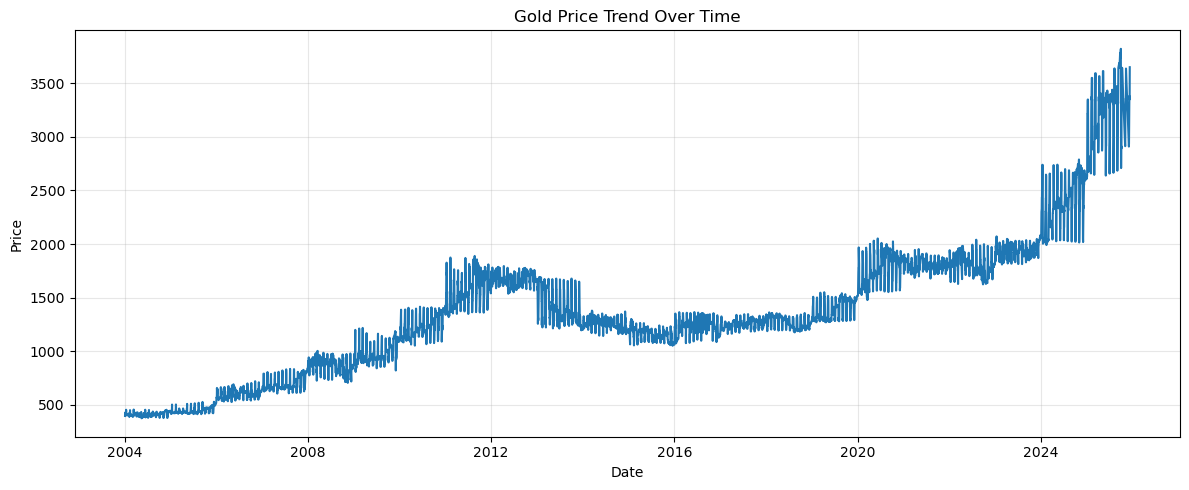

Initial Price: 399.2999878 | Final Price: 3649.399902 | Overall Growth: 813.95%


In [9]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Price'])
plt.title('Gold Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
initial = df['Price'].iloc[0]
final = df['Price'].iloc[-1]
growth = ((final - initial)/initial)*100
print(f'Initial Price: {initial} | Final Price: {final} | Overall Growth: {growth:.2f}%')

## Insight 2 — Yearly Average Price Trend
Compute average price per year and plot to identify peak years.

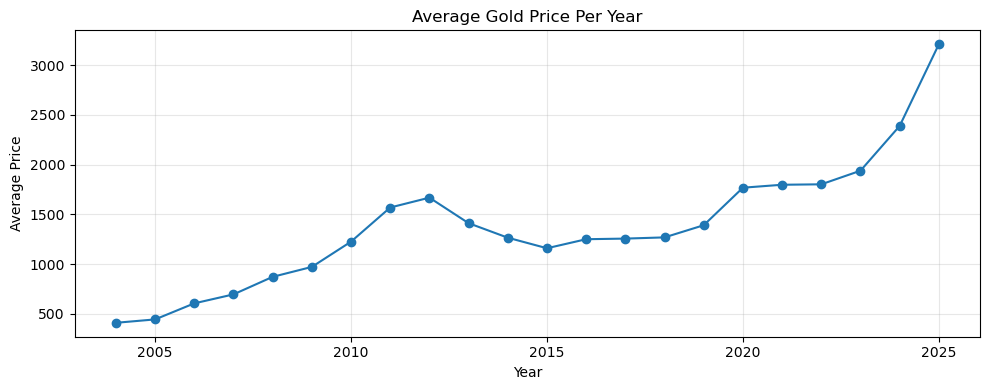

Year with highest average price: 2025 (avg = 3210.69)


In [34]:
df['Year'] = df['Date'].dt.year
yearly_avg = df.groupby('Year')['Price'].mean()
plt.figure(figsize=(10,4))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o')
plt.title('Average Gold Price Per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
top_year = yearly_avg.idxmax()
print(f'Year with highest average price: {top_year} (avg = {yearly_avg.loc[top_year]:.2f})')

## Insight 3 - return distribution
makes us understand how daily returns are distributed over time

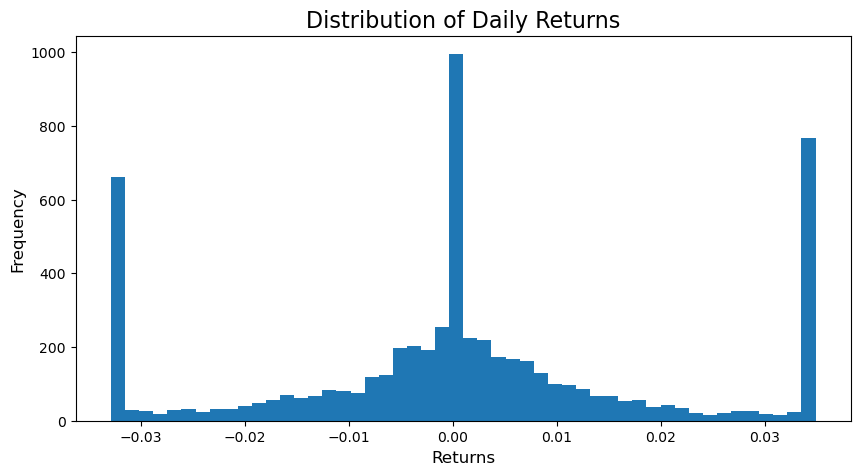

In [7]:
plt.figure(figsize=(10,5))
plt.hist(df["Returns"], bins=50)
plt.title("Distribution of Daily Returns", fontsize=16)
plt.xlabel("Returns", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

## Insight 4 — Daily Volatility
Plot daily percent-change to inspect volatility and compute average daily volatility.

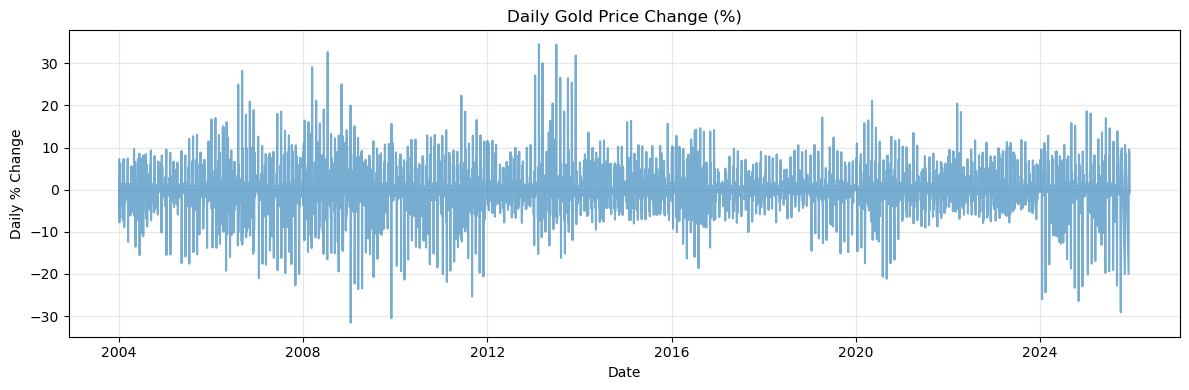

Average daily volatility (std dev of daily % change): 4.56%


In [17]:
df['Daily Change %'] = df['Price'].pct_change() * 100
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Daily Change %'], alpha=0.6)    
plt.title('Daily Gold Price Change (%)')
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
vol = df['Daily Change %'].std()
print(f'Average daily volatility (std dev of daily % change): {vol:.2f}%')

## Insight 5 — Rolling Mean (Smoothed Trend)
Plot the 30-day rolling mean to visualize the smoothed trend and detect reversals.

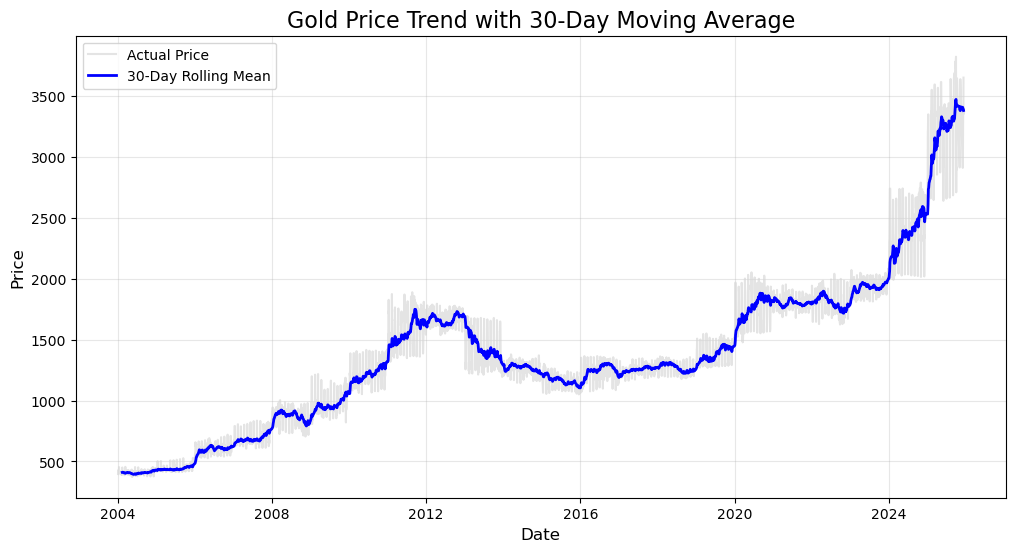

The rolling mean removes short-term noise and highlights persistent trends. Useful for strategy signals (e.g., price above/below MA).


In [21]:
df["Rolling Mean (30 days)"] = df["Price"].rolling(window=30).mean()
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Price"], color='lightgray', alpha=0.6, label="Actual Price")
plt.plot(df["Date"], df["Rolling Mean (30 days)"], color='blue', label="30-Day Rolling Mean", linewidth=2)
plt.title("Gold Price Trend with 30-Day Moving Average", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
print("The rolling mean removes short-term noise and highlights persistent trends. Useful for strategy signals (e.g., price above/below MA).")

## Insight 6 — Price Spikes Detection
Detect and plot days with large daily changes (e.g., >2%). These are potential arbitrage or shock events.

Number of spike days (>2.0% change): 1908


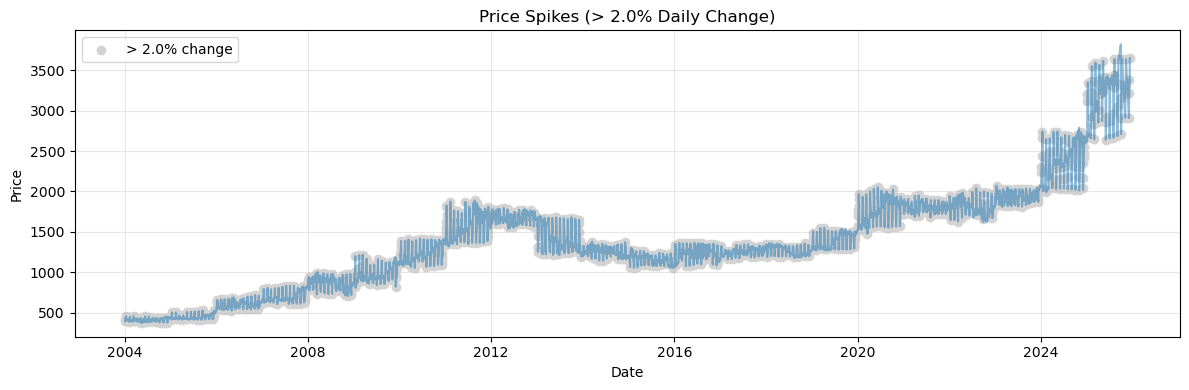


Top 10 spike days:


,Date,Close,High,Low,Open,Volume,Price,Returns,Price_scaled,Volume_scaled,Returns_scaled,Year,Month,Volatility,Daily Change %,Rolling Mean (30 days),Weekday,Rolling_Volatility,Day
2578,2013-02-13,1644.199951,1652.300049,1640.199951,1652.199951,236.0,1644.199951,0.034894,0.461870,-0.260817,1.783054,2013,2,12.100098,34.516885,1521.359998,Wednesday,9.521963,13
2684,2013-07-01,1645.500000,1659.900024,1643.800049,1656.500000,49.0,1645.500000,0.034894,0.464005,-0.264159,1.783054,2013,7,16.099975,34.458239,1380.213330,Monday,8.530520,1
1269,2008-07-14,972.700012,974.599976,955.000000,964.700012,55.0,972.700012,0.034894,-0.640890,-0.264052,1.783054,2008,7,19.599976,32.665029,879.519999,Monday,8.997032,14
2809,2013-12-02,1648.699951,1650.400024,1642.400024,1643.800049,85.0,1648.699951,0.034894,0.469260,-0.263515,1.783054,2013,12,8.000000,31.832719,1349.440002,Monday,8.206255,2
1413,2009-01-13,820.099976,825.599976,815.700012,825.599976,20.0,820.099976,-0.032866,-0.891495,-0.264677,-1.782410,2009,1,9.899963,-31.607039,879.913330,Tuesday,8.365479,13
1663,2009-12-01,820.299988,844.400024,815.400024,844.400024,72.0,820.299988,-0.032866,-0.891167,-0.263748,-1.782410,2009,12,29.000000,-30.547794,1061.176668,Tuesday,6.497853,1
2600,2013-03-13,1588.300049,1596.000000,1585.000000,1592.300049,396.0,1588.300049,0.034894,0.370069,-0.257957,1.783054,2013,3,11.000000,30.007376,1467.306653,Wednesday,10.146413,13
6171,2025-10-01,2708.500000,2720.100098,2683.699951,2686.100098,403.0,2708.500000,-0.032866,2.209700,-0.257832,-1.782410,2025,10,36.400147,-29.113558,3448.976660,Wednesday,7.778030,1
1176,2008-03-13,992.299988,998.500000,983.700012,983.700012,10.0,992.299988,0.034894,-0.608703,-0.264856,1.783054,2008,3,14.799988,29.071280,896.446663,Thursday,8.725193,13
744,2006-09-05,699.400024,679.000000,679.000000,679.000000,8.0,699.400024,0.034894,-1.089713,-0.264892,1.783054,2006,9,0.000000,28.212653,610.783331,Tuesday,8.189237,5


In [35]:
threshold = 2.0
spikes = df[df['Daily Change %'].abs() > threshold]
print(f'Number of spike days (>{threshold}% change):', len(spikes))
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Price'], alpha=0.5)
plt.scatter(spikes['Date'], spikes['Price'], color='lightgray', label=f'> {threshold}% change')
plt.title(f'Price Spikes (> {threshold}% Daily Change)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print('\nTop 10 spike days:')
display(spikes.sort_values('Daily Change %', key=abs, ascending=False).head(10))

## Insight 7 - Top Profitable Days (Biggest Positive Moves)
Which days gold gave the highest daily % gain.

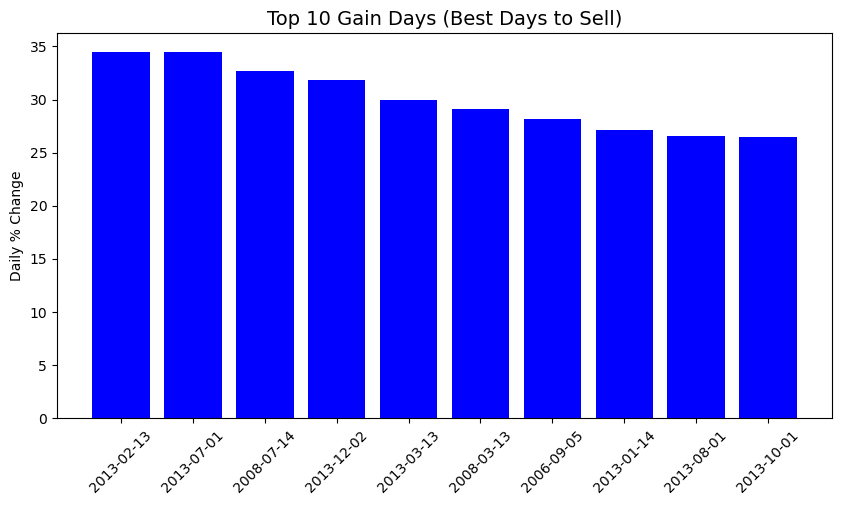

These are the top 10 days gold surged the most (good SELL days):


,Date,Price,Daily Change %
2578,2013-02-13,1644.199951,34.516885
2684,2013-07-01,1645.500000,34.458239
1269,2008-07-14,972.700012,32.665029
2809,2013-12-02,1648.699951,31.832719
2600,2013-03-13,1588.300049,30.007376
1176,2008-03-13,992.299988,29.071280
744,2006-09-05,699.400024,28.212653
2555,2013-01-14,1668.900024,27.096189
2708,2013-08-01,1661.500000,26.600120
2758,2013-10-01,1677.300049,26.445537


In [26]:
top_gains = df.sort_values("Daily Change %", ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top_gains["Date"].astype(str), top_gains["Daily Change %"], color="blue")
plt.xticks(rotation=45)
plt.title("Top 10 Gain Days (Best Days to Sell)", fontsize=14)
plt.ylabel("Daily % Change")
plt.show()
print("These are the top 10 days gold surged the most (good SELL days):")
display(top_gains[["Date", "Price", "Daily Change %"]])

## Insight 8 - Worst Days (Biggest Negative Moves)
Which days gold dropped sharply → best buying opportunities.

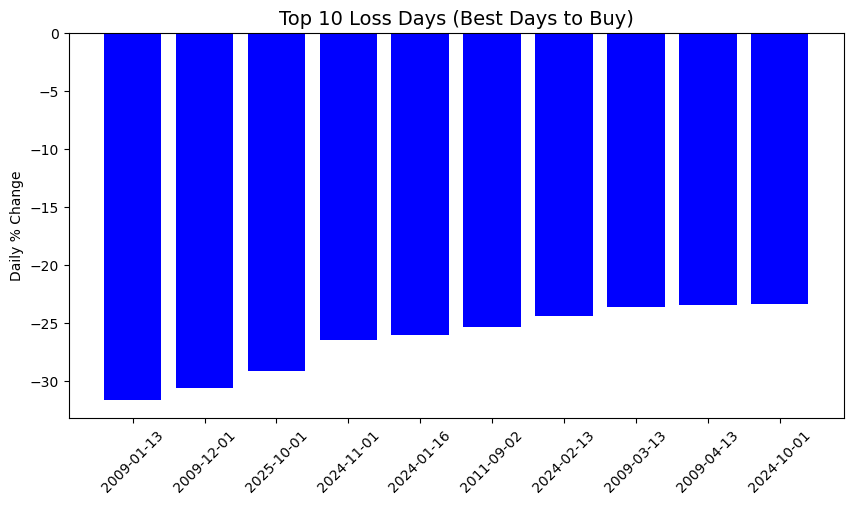

These are the top 10 days gold dropped the most (good BUY days):


,Date,Price,Daily Change %
1413,2009-01-13,820.099976,-31.607039
1663,2009-12-01,820.299988,-30.547794
6171,2025-10-01,2708.500000,-29.113558
5933,2024-11-01,2014.300049,-26.439761
5704,2024-01-16,2026.000000,-26.020597
2170,2011-09-02,1364.800049,-25.359582
5726,2024-02-13,1992.900024,-24.365247
1459,2009-03-13,929.799988,-23.624119
1483,2009-04-13,894.700012,-23.451405
5907,2024-10-01,2021.699951,-23.307163


In [28]:
top_losses = df.sort_values("Daily Change %", ascending=True).head(10)
plt.figure(figsize=(10,5))
plt.bar(top_losses["Date"].astype(str), top_losses["Daily Change %"], color="blue")
plt.xticks(rotation=45)
plt.title("Top 10 Loss Days (Best Days to Buy)", fontsize=14)
plt.ylabel("Daily % Change")
plt.show()
print("These are the top 10 days gold dropped the most (good BUY days):")
display(top_losses[["Date", "Price", "Daily Change %"]])

## Insight 9 - Best Months to Trade
Which months (across all years) usually give higher average returns.

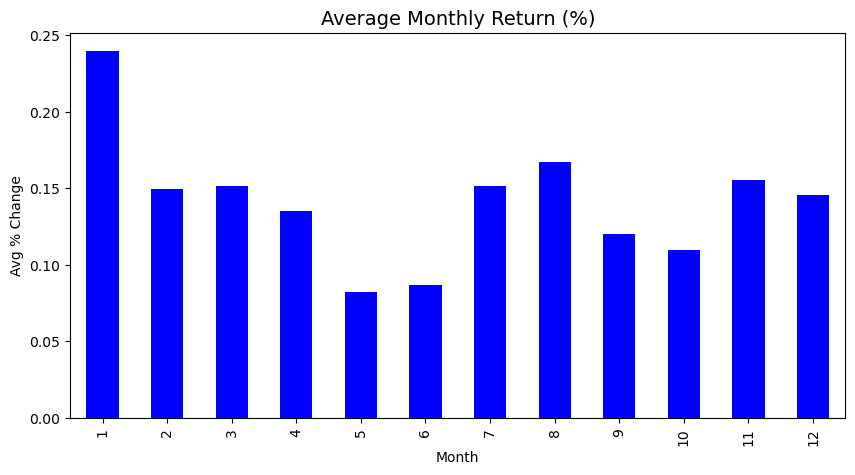

Months with higher avg % change are more profitable trading periods.


In [30]:
df["Month"] = df["Date"].dt.month
monthly_avg = df.groupby("Month")["Daily Change %"].mean()
plt.figure(figsize=(10,5))
monthly_avg.plot(kind="bar", color="blue")
plt.title("Average Monthly Return (%)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Avg % Change")
plt.show()
print("Months with higher avg % change are more profitable trading periods.")

## Insight 10 - Weekday Analysis
Which weekdays (Mon–Fri) are most volatile/profitable.

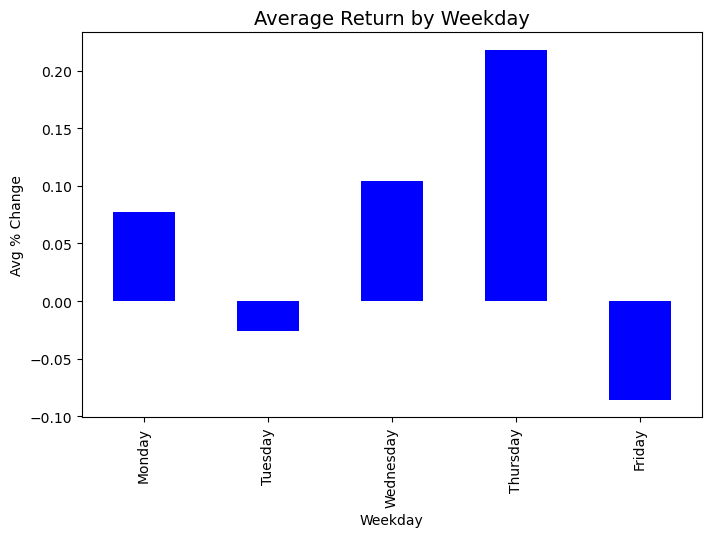

Certain weekdays show more movement → better for short-term trades.


In [31]:
df["Weekday"] = df["Date"].dt.day_name()
weekday_avg = df.groupby("Weekday")["Daily Change %"].mean().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday"])
plt.figure(figsize=(8,5))
weekday_avg.plot(kind="bar", color="blue")
plt.title("Average Return by Weekday", fontsize=14)
plt.ylabel("Avg % Change")
plt.show()
print("Certain weekdays show more movement → better for short-term trades.")

## Insight 11 - Most Volatile Periods (Rolling Volatility)
Detect windows of high risk/high opportunity.

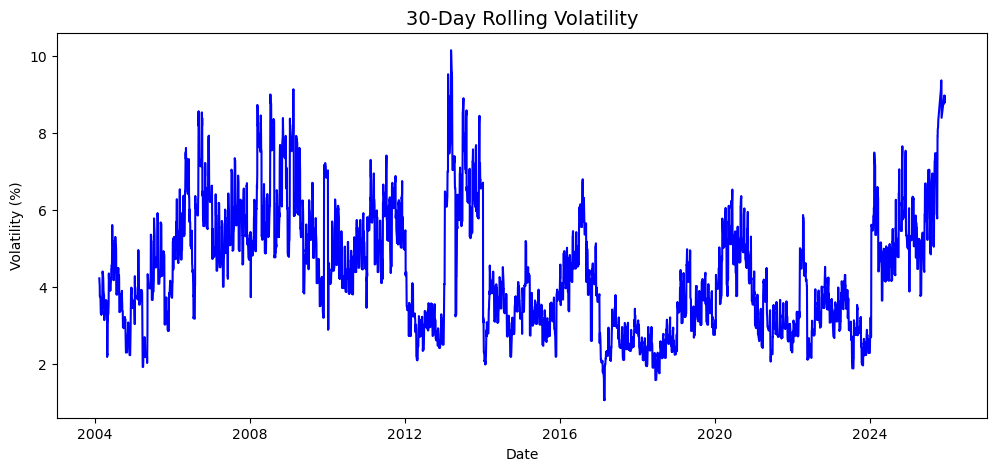

Periods with higher volatility are ideal for arbitrage opportunities.


In [32]:
df["Rolling_Volatility"] = df["Daily Change %"].rolling(30).std()
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Rolling_Volatility"], color="blue")
plt.title("30-Day Rolling Volatility", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.show()
print("Periods with higher volatility are ideal for arbitrage opportunities.")

## Summary: Actionable Trading Insights
Best SELL Days: Top surge days (price spiked)

Best BUY Days: Top drop days (price crashed)

Best Months: Seasonality of returns

Best Weekdays: Which weekdays are most profitable historically

High-Volatility Periods: Detect risky but lucrative arbitrage windows